In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import spacy

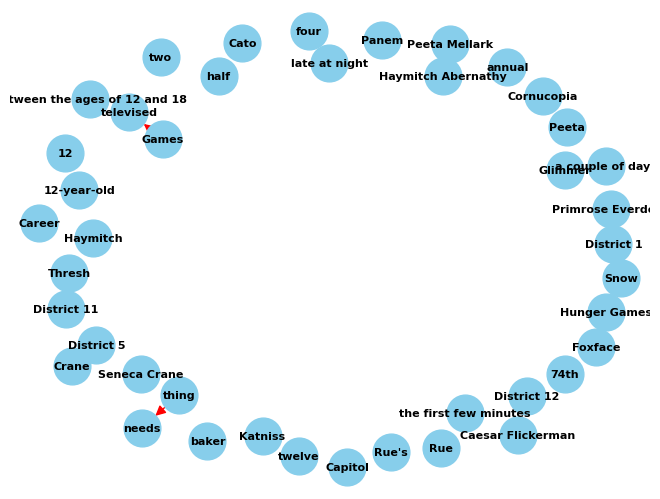

In [4]:

# Your plot summary
plot = """
The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies and almost always win. During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss. She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may provide in-Games gifts of food, medicine, and tools. However, she discovers Peeta meant what he said. The televised Games begin with half of the tributes killed in the first few minutes; Katniss barely survives ignoring Haymitch's advice to run away from the melee over the tempting supplies and weapons strewn in front of a structure called the Cornucopia. Peeta forms an uneasy alliance with the four Careers. They later find Katniss and corner her up a tree. Rue, hiding in a nearby tree, draws her attention to a poisonous tracker jacker nest hanging from a branch. Katniss drops it on her sleeping besiegers. They all scatter, except for Glimmer, who is killed by the insects. Hallucinating due to tracker jacker venom, Katniss is warned to run away by Peeta. Rue cares for Katniss for a couple of days until she recovers. Meanwhile, the alliance has gathered all the supplies into a pile. Katniss has Rue draw them off, then destroys the stockpile by setting off the mines planted around it. Furious, Cato kills the boy assigned to guard it. As Katniss runs from the scene, she hears Rue calling her name. She finds Rue trapped and releases her. Marvel, a tribute from District 1, throws a spear at Katniss, but she dodges the spear, causing it to stab Rue in the stomach instead. Katniss shoots him dead with an arrow. She then comforts the dying Rue with a song. Afterward, she gathers and arranges flowers around Rue's body. When this is televised, it sparks a riot in Rue's District 11. President Snow summons Seneca Crane, the Gamemaker, to express his displeasure at the way the Games are turning out. Since Katniss and Peeta have been presented to the public as "star-crossed lovers", Haymitch is able to convince Crane to make a rule change to avoid inciting further riots. It is announced that tributes from the same district can win as a pair. Upon hearing this, Katniss searches for Peeta and finds him with an infected sword wound in the leg. She portrays herself as deeply in love with him and gains a sponsor's gift of soup. An announcer proclaims a feast, where the thing each survivor needs most will be provided. Peeta begs her not to risk getting him medicine. Katniss promises not to go, but after he falls asleep, she heads to the feast. Clove ambushes her and pins her down. As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue. He spares Katniss "just this time...for Rue". The medicine works, keeping Peeta mobile. Foxface, the girl from District 5, dies from eating nightlock berries she stole from Peeta; neither knew they are highly poisonous. Crane changes the time of day in the arena to late at night and unleashes a pack of hound-like creatures to speed things up. They kill Thresh and force Katniss and Peeta to flee to the roof of the Cornucopia, where they encounter Cato. After a battle, Katniss wounds Cato with an arrow and Peeta hurls him to the creatures below. Katniss shoots Cato to spare him a prolonged death. With Peeta and Katniss apparently victorious, the rule change allowing two winners is suddenly revoked. Peeta tells Katniss to shoot him. Instead, she gives him half of the nightlock. However, before they can commit suicide, they are hastily proclaimed the victors of the 74th Hunger Games. Haymitch warns Katniss that she has made powerful enemies after her display of defiance. She and Peeta return to District 12, while Crane is locked in a room with a bowl of nightlock berries, and President Snow considers the situation.
"""

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the plot summary with spaCy
doc = nlp(plot)

# Create a directed graph
G = nx.DiGraph()

# Add nodes for entities (persons, organizations, etc.)
for ent in doc.ents:
    G.add_node(ent.text, label=ent.label_)

# Add edges based on verbs and their relationships
for sent in doc.sents:
    for token in sent:
        if token.pos_ == "VERB":
            # Subject of the verb (outgoing edge)
            if token.head.dep_ in ('nsubj', 'nsubjpass'):
                subj = token.head.text
                G.add_edge(subj, token.text, relation="subject")

            # Object of the verb (incoming edge)
            if token.head.dep_ == 'attr' and token.head.head == token:
                obj = token.head.text
                G.add_edge(obj, token.text, relation="object")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, edge_color='red', font_color='black', arrowsize=15)

# Show the plot
plt.show()


In [6]:
for sentence in doc.sents:
    print(sentence)


The nation of Panem consists of a wealthy Capitol and twelve poorer districts.
As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games.
The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth.
In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12.
Her older sister Katniss volunteers to take her place.
Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute.
Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy.
He warns them about the "Career" tributes who train intensively at special academies and almost always win.
During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss.
She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may 

In [7]:
doc.ents

(Panem,
 Capitol,
 twelve,
 between the ages of 12 and 18,
 annual,
 Hunger Games,
 12-year-old,
 Primrose Everdeen,
 District 12,
 Katniss,
 Peeta Mellark,
 baker,
 Katniss,
 District 12,
 Katniss,
 Peeta,
 Capitol,
 Haymitch Abernathy,
 Career,
 Caesar Flickerman,
 Peeta,
 Katniss,
 Peeta,
 half,
 the first few minutes,
 Katniss,
 Haymitch,
 Cornucopia,
 four,
 Katniss,
 Katniss,
 Glimmer,
 Katniss,
 Peeta,
 Katniss,
 a couple of days,
 Katniss,
 Cato,
 Katniss,
 Rue,
 District 1,
 Katniss,
 Rue,
 Rue,
 Rue,
 Rue's,
 District 11,
 Snow,
 Seneca Crane,
 Katniss,
 Peeta,
 Haymitch,
 Katniss,
 Peeta,
 Katniss,
 Thresh,
 District 11,
 Katniss,
 Rue,
 Rue,
 Peeta,
 Foxface,
 District 5,
 Peeta,
 late at night,
 Thresh,
 Cornucopia,
 Cato,
 Katniss,
 Cato,
 Peeta,
 Katniss,
 Cato,
 Peeta,
 Katniss,
 two,
 Katniss,
 half,
 74th,
 Hunger Games,
 Peeta,
 12,
 Crane,
 Snow)

In [5]:
for token in doc:
    print(token.text, token.pos_, token.dep_)


 SPACE dep
The DET det
nation NOUN nsubj
of ADP prep
Panem PROPN pobj
consists VERB ROOT
of ADP prep
a DET det
wealthy ADJ amod
Capitol PROPN pobj
and CCONJ cc
twelve NUM nummod
poorer ADJ amod
districts NOUN conj
. PUNCT punct
As ADP prep
punishment NOUN pobj
for ADP prep
a DET det
past ADJ amod
rebellion NOUN pobj
, PUNCT punct
each DET det
district NOUN nsubj
must AUX aux
provide VERB ROOT
a DET det
boy NOUN dobj
and CCONJ cc
girl NOUN conj
between ADP prep
the DET det
ages NOUN pobj
of ADP prep
12 NUM pobj
and CCONJ cc
18 NUM conj
selected VERB acl
by ADP agent
lottery NOUN pobj
for ADP prep
the DET det
annual ADJ amod
Hunger PROPN compound
Games PROPN pobj
. PUNCT punct
The DET det
tributes NOUN nsubj
must AUX aux
fight VERB ccomp
to ADP prep
the DET det
death NOUN pobj
in ADP prep
an DET det
arena NOUN pobj
; PUNCT punct
the DET det
sole ADJ amod
survivor NOUN nsubjpass
is AUX auxpass
rewarded VERB ROOT
with ADP prep
fame NOUN pobj
and CCONJ cc
wealth NOUN conj
. PUNCT punct
In 